In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


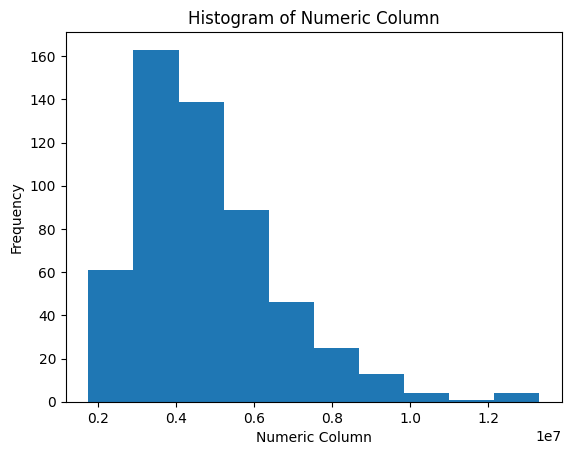

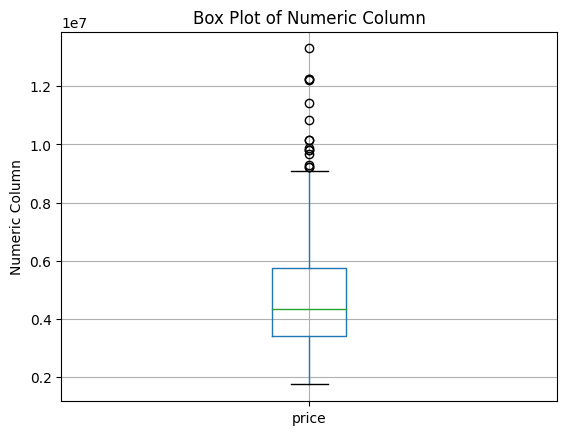

In [6]:
summary_stats = df['price'].describe()
print(summary_stats)

# Histogram
df['price'].plot.hist()
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()

print()
# Box plot
df.boxplot(column='price')
plt.ylabel('Numeric Column')
plt.title('Box Plot of Numeric Column')
plt.show()

no     373
yes    172
Name: airconditioning, dtype: int64


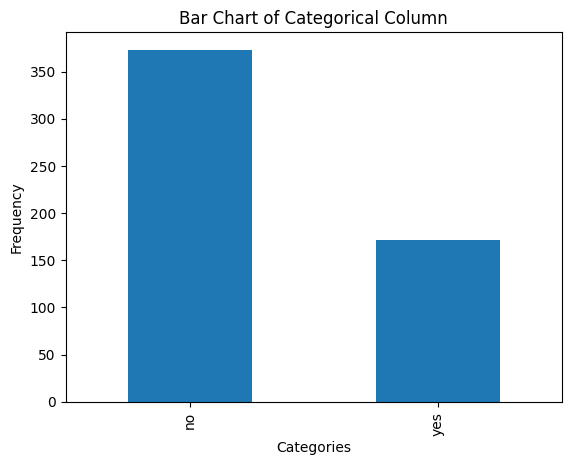

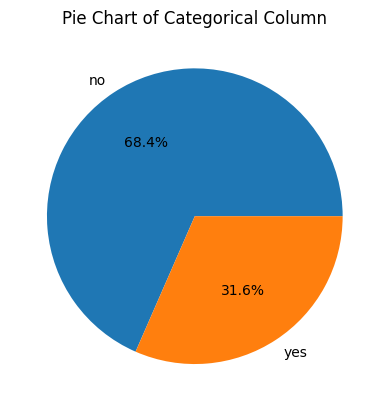

In [8]:
frequency = df['airconditioning'].value_counts()
print(frequency)

# Bar chart
frequency.plot.bar()
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Chart of Categorical Column')
plt.show()

print()
# Pie chart
frequency.plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Pie Chart of Categorical Column')
plt.show()

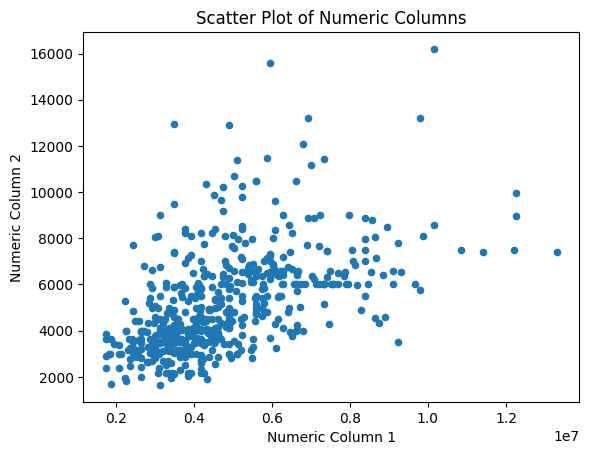

Correlation coefficient: 0.5359973457780796


In [9]:
df.plot.scatter(x='price', y='area')
plt.xlabel('Numeric Column 1')
plt.ylabel('Numeric Column 2')
plt.title('Scatter Plot of Numeric Columns')
plt.show()

# Correlation coefficient
correlation = df['price'].corr(df['area'])
print("Correlation coefficient:", correlation)

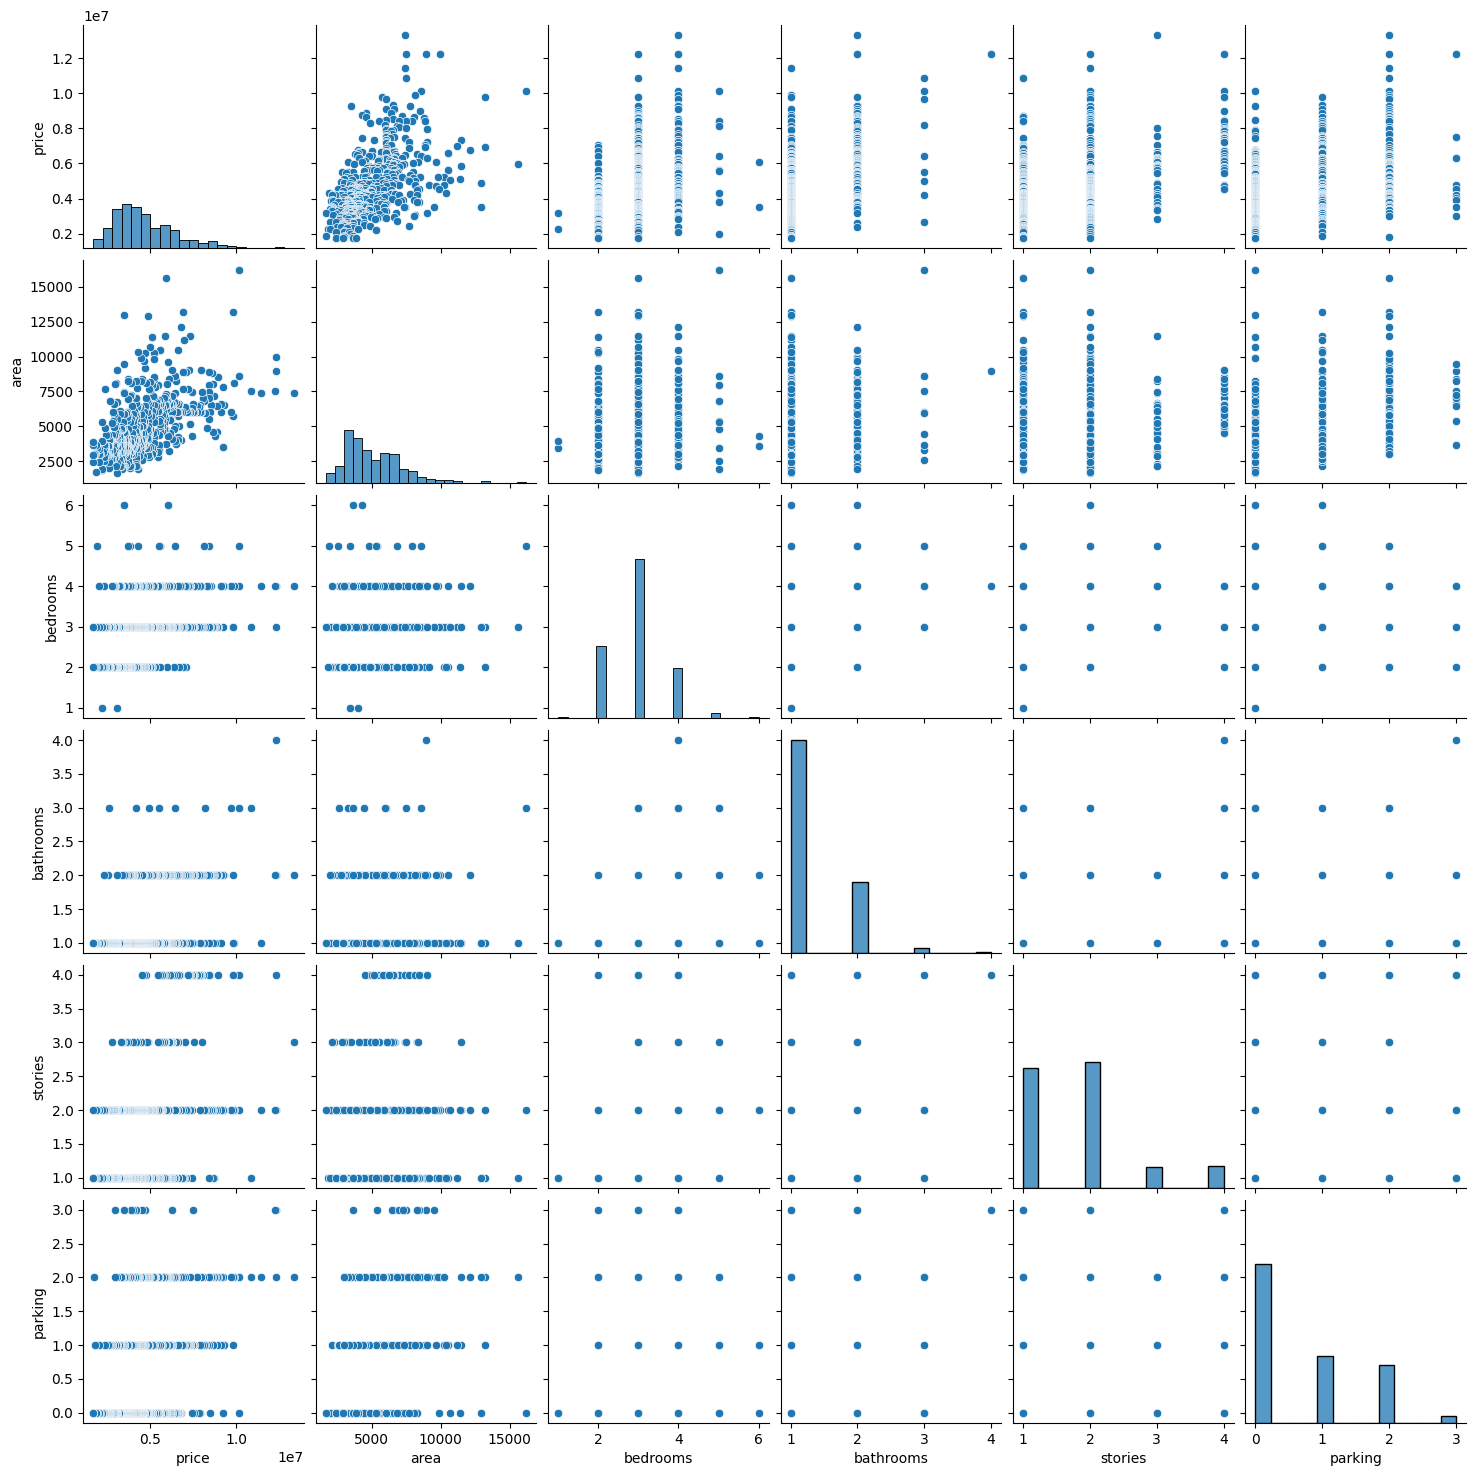

<ipython-input-11-d03cee523b34>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


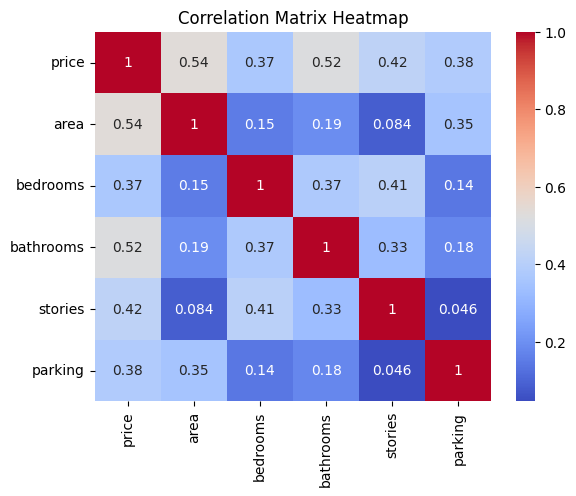

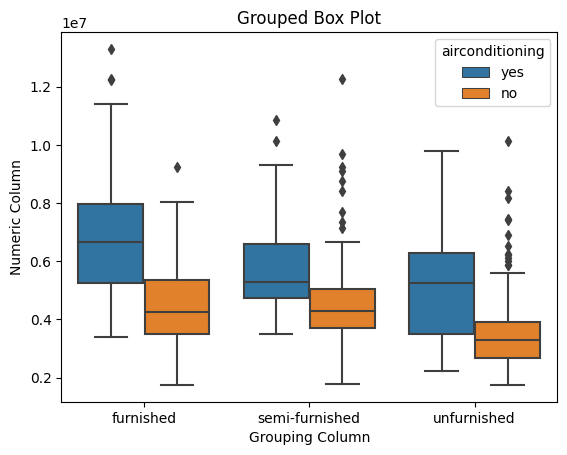

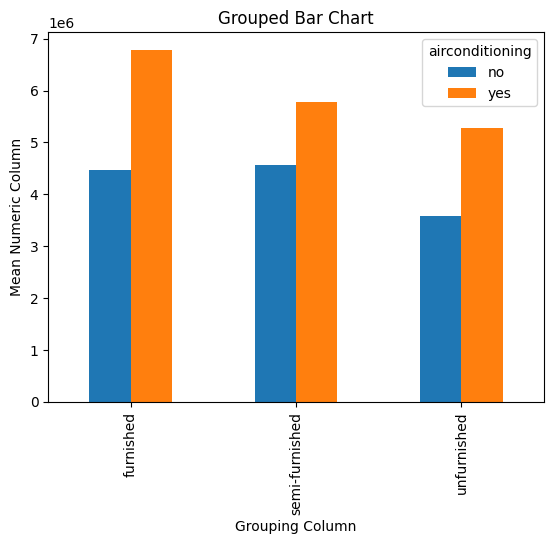

In [11]:
sns.pairplot(df)
plt.show()

print()
# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
print()
# Grouped box plot
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=df)
plt.xlabel('Grouping Column')
plt.ylabel('Numeric Column')
plt.title('Grouped Box Plot')
plt.show()
print()
# Grouped bar chart
grouped_data = df.groupby(['furnishingstatus', 'airconditioning'])['price'].mean().unstack()
grouped_data.plot.bar()
plt.xlabel('Grouping Column')
plt.ylabel('Mean Numeric Column')
plt.title('Grouped Bar Chart')
plt.show()

In [12]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [21]:
numerical_columns = df.select_dtypes(include='number')

# Print the numerical columns
for column in numerical_columns:
    print(column)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5  # Adjust the threshold value as needed
    outliers_iqr_count = len(df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)])
    print(outliers_iqr_count)



price
15
area
12
bedrooms
12
bathrooms
1
stories
41
parking
12


In [22]:
for column in numerical_columns:
    print(column)
    outliers = df[(np.abs(df[column] - df[column].mean()) / df[column].std()) > threshold]
    df.loc[outliers.index, column] = df[column].mean()  # Replace with desired imputation method


price
area
bedrooms
bathrooms
stories
parking


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    float64
 11  furnishingstatus  545 non-null    object 
dtypes: float64(6), object(6)
memory usage: 51.2+ KB


In [25]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [36]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})

In [37]:
df['furnishingstatus'] = df['furnishingstatus'].map({'semi-furnished': 1, 'unfurnished': 0 , 'furnished': 2})

In [38]:
X = df.drop('furnishingstatus' , axis = 1)
y = df['furnishingstatus']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
scaled_features = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X = pd.DataFrame(scaled_features, columns=X.columns)

In [40]:
from sklearn.model_selection import train_test_split
X_train ,  X_test ,y_train , y_test = train_test_split(X,y,train_size = 0.7 , random_state= 41)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)

[0.79600102 1.11543449 0.49942579 1.27007198 0.79771247 1.27653298
 1.09506206 0.40706283 1.16344371 0.6116381  0.8707594  1.33992967
 0.72327444 0.2935721  0.71294831 0.72412805 0.7500434  1.52340453
 0.51151721 0.64603896 0.92281726 0.47255373 0.33649295 0.98658118
 0.73219717 0.68387987 1.11768212 0.91989894 0.76025354 1.27860191
 0.41235232 0.73005027 0.49867172 1.33168942 1.55847034 1.339221
 0.67846825 1.13440908 1.20451636 1.00018211 0.72104521 1.08966179
 0.62663555 0.57981428 0.60694452 1.07554057 0.64903649 1.46228475
 1.32400395 1.11592497 0.98379957 0.96040628 0.66555496 0.84943168
 0.9828019  0.98741593 0.60137408 1.06130089 1.08826279 1.1619371
 1.19702399 0.94189287 1.17950321 0.6975214  0.69597574 1.00555713
 0.64293587 0.83498439 0.92261919 1.43272793 0.92422399 1.40024071
 1.22266694 1.04538489 1.29745305 1.06009322 0.97367662 1.15230271
 1.28161816 1.10742182 0.78432855 1.01391197 0.83393718 1.16278143
 1.15526176 0.97692155 1.2007575  1.146812   0.71457167 1.5673232

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)






Mean Squared Error (MSE): 0.55819362374931
Root Mean Squared Error (RMSE): 0.7471235665867528
Mean Absolute Error (MAE): 0.6230894483119295
R-squared (R2): 0.016174593423234684
